In [18]:
import pandas as pd
import plotly.express as px
from src.utils import dataframe_coeficientes

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

RANDOM_STATE = 42

In [19]:
df = pd.read_parquet('../dados/diabetes_tratador.parquet')
df

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [20]:
X = df.drop(columns="target")
y = df['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)


pipeline = Pipeline([
    ("scaler", StandardScaler()), #ele coloca as colunas na mesma escala para que diferenças numéricas não virem peso indevido no modelo
    ("reg", LinearRegression())
])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [23]:
pipeline.score(X_test, y_test)

0.45260276297191926

In [24]:
pipeline.named_steps

{'scaler': StandardScaler(), 'reg': LinearRegression()}

In [25]:
pipeline["reg"].coef_

array([  1.75375799, -11.51180908,  25.60712144,  16.82887167,
       -44.44885564,  24.64095356,   7.67697768,  13.1387839 ,
        35.16119521,   2.35136365])

In [26]:
coefs = dataframe_coeficientes(coeficientes=pipeline["reg"].coef_, colunas=X.columns)

coefs

,coeficiente
colesterol_total,-44.448856
sexo,-11.511809
idade,1.753758
glicose,2.351364
hdl,7.676978
colesterol_hdl,13.138784
pressao_media,16.828872
ldl,24.640954
imc,25.607121
triglicerides,35.161195


In [27]:
fig = px.bar(coefs, template="plotly_dark", orientation='h', labels={"value": "Coeficiente", "index": "Variável"})
fig.show()

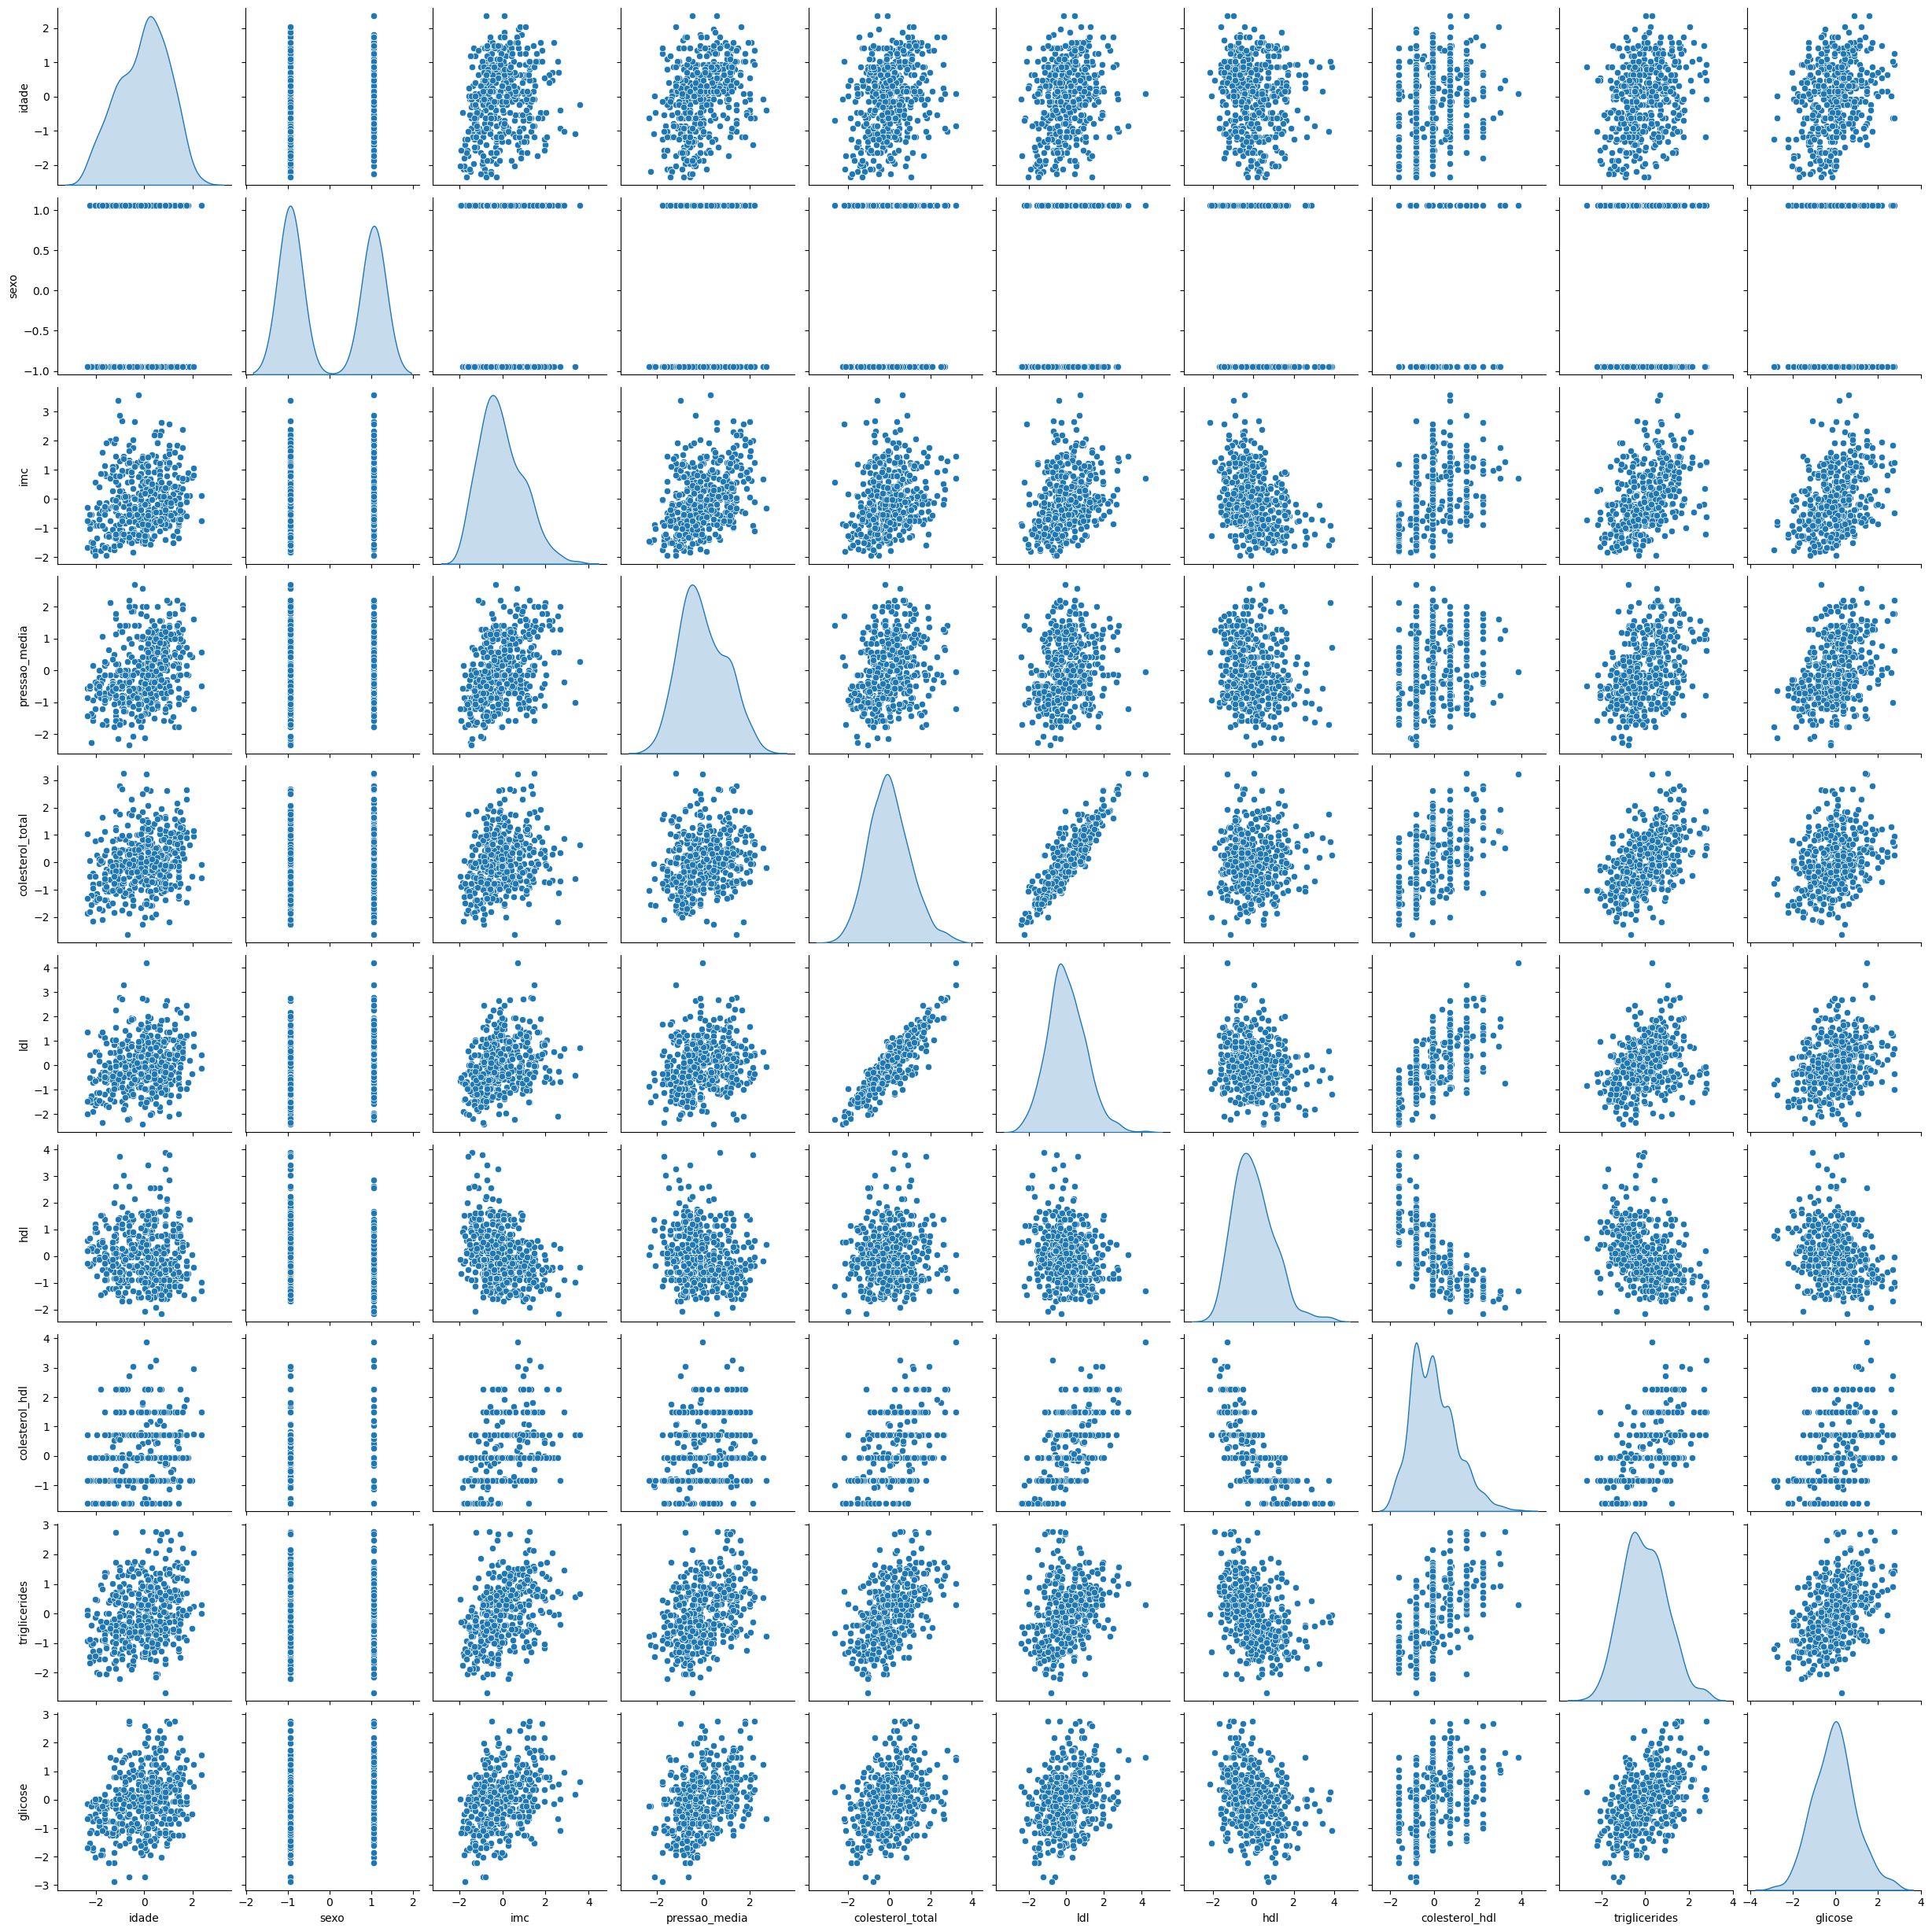

In [28]:
X_scaled = pipeline['scaler'].transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

sns.pairplot(X_scaled, diag_kind="kde")